# Lead Scoring Case Study

#### Problem Statement: 
             

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

   The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

   Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
 
   There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

   X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
 

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

#### Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Data Understanding

In [720]:
# Importing the necessary libaries that require for analysis

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [721]:
# Importing Dataset 
df = pd.read_csv("Leads.csv")
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [723]:
# checking rows and columns in dataset
df.shape

(9240, 37)

- There are 37 columns and 9240 rows in dataset.

In [724]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- The lead conversion rate that was seen above is 39%. With an average of 3.45 visits and a standard deviation of 4.85, the visit count is highly distributed. With a standard deviation of 548 seconds, the average time spent on the website is 488 seconds. With a standard deviation of 2.16, the average number of pages viewed per visit is 2.36. 

In [725]:
#Checking for the Null values
df.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [726]:
# Checking for duplicates in dataset
df['Prospect ID'].duplicated().sum() == 0

True

In [727]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Data Cleaning 

In [728]:
# As they each have a unique value, we can drop Lead Number and Prospect ID column.
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

- Several columns clearly have Select values in them. In this instance, Select is shown because the buyer made no selections from the list. Exactly as good as NULL are select values.

In [729]:
# Converting Select Values into NaN

df = df.replace('Select', np.nan)

In [730]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [731]:
# Converting the null values into percentages
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [732]:
# Removing null values with percentages higher than 40%
df = df.loc[:, (df.isnull().sum()/len(df)*100) < 40]

In [733]:
# Checking B
round(df.isnull().mean()*100,1)

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

In [734]:
# Checking the Outlies and handling Missing values
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [735]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [736]:
# EDA

In [737]:
def categorical_graph(c):
    print(df[c].value_counts())
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    sns.countplot(x=df[c],ec='black',palette='gist_rainbow')
    plt.xticks(rotation=60, ha='right',fontsize=12)
    plt.title(f'Categorical chart of {c} Column',fontsize=15)
    plt.xlabel(c, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.subplot(122)
    sns.countplot(x=df[c], palette=["orange", "red"], data=df, hue='Converted',ec='black')
    plt.xticks(rotation=60, ha='right',fontsize=12)
    plt.title(f'Categorical chart of {c} Column w.r.t Converted',fontsize=15)
    plt.xlabel(c, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.legend(labels=['Not Converted', 'Converted'], loc='upper right')
    plt.show()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


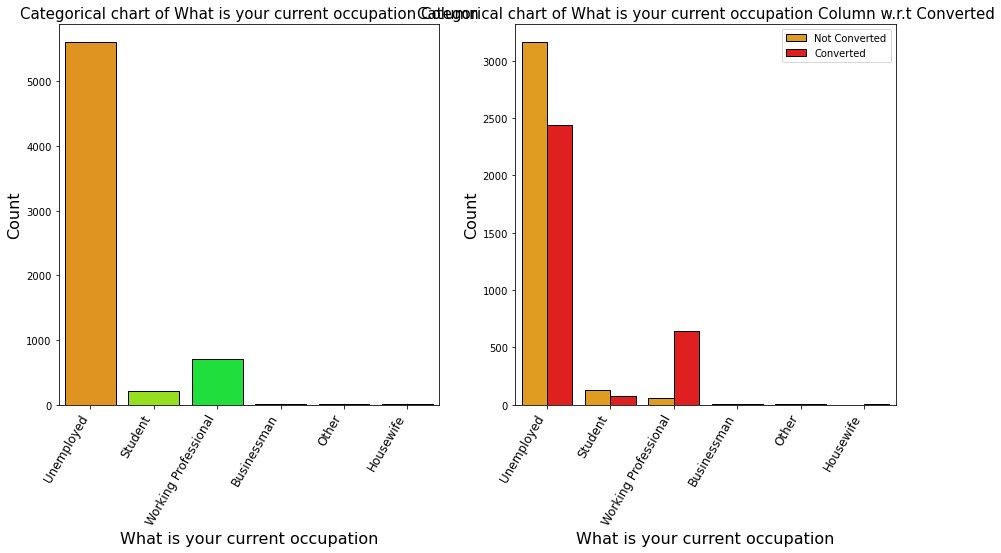

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


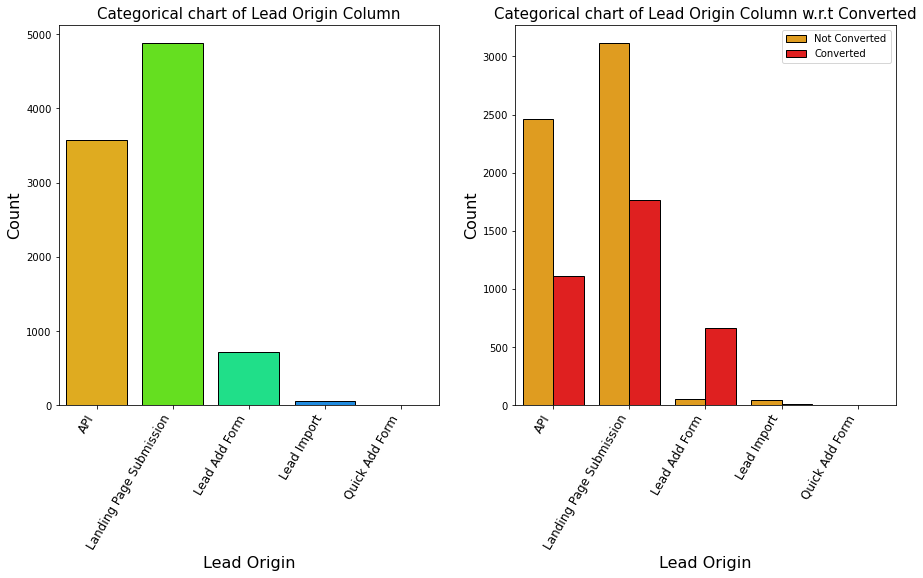

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


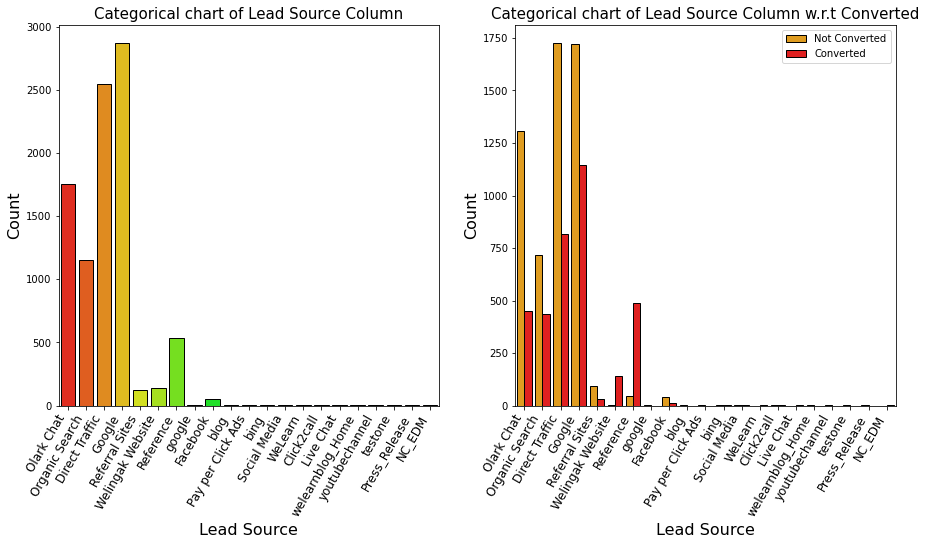

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


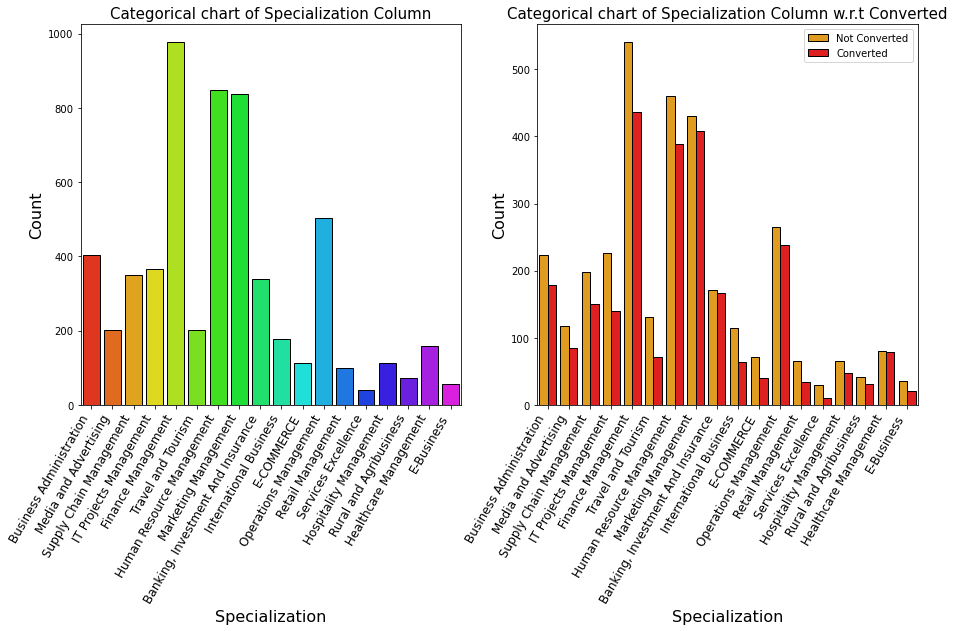

In [738]:
for col in ['What is your current occupation','Lead Origin','Lead Source','Specialization']:
    categorical_graph(col)

- Lead add forms and landing page submissions account for the majority of conversions.
- Websites like Google, organic search, direct traffic, and referrals are the top sources of leads.
- The most popular category is "other," which includes chosen departments like finance, marketing, and HR, where the majority of consumers are employed.
- The majority of clients are jobless, with working professionals constituting the largest percentage of converted clients.
- A higher percentage of clients say no than yes.


In [739]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [740]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [741]:
df['City'] = df['City'].replace(np.NaN,'Mumbai')

In [742]:
df['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- Since specialization wasn't on the list or they are still students and don't yet have one, it's likely that the lead didn't mention it. Thus, in place of NaN values, we will write "Not Specified" here.

In [743]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

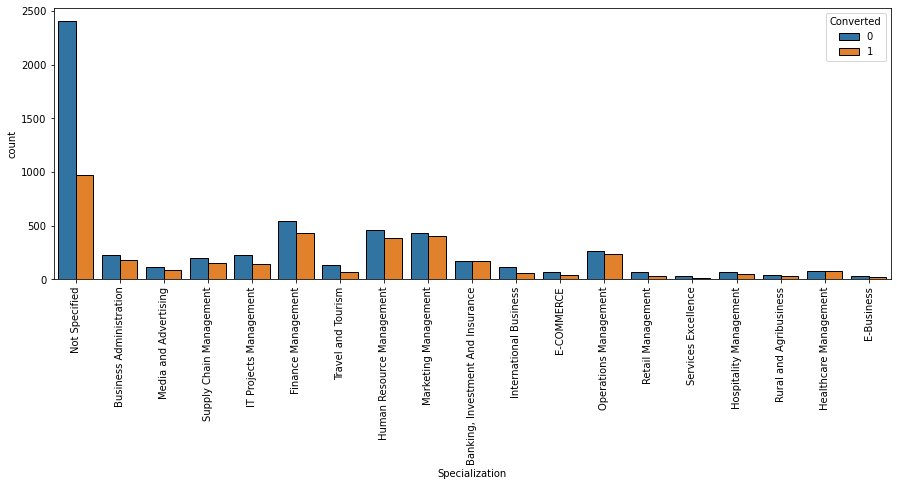

In [744]:
# Plottiing the specialization column
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted,ec='black')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- We observe that specialisations that include finance management have higher lead generation and conversion rates. So, it is clear that this factor is important and should not be ignored.

In [745]:
df['Specialization'] = df['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                           'Marketing Management', 'Operations Management',
                                                           'IT Projects Management', 'Supply Chain Management',
                                                           'Healthcare Management', 'Hospitality Management',
                                                           'Retail Management'], 'Management_Specializations')

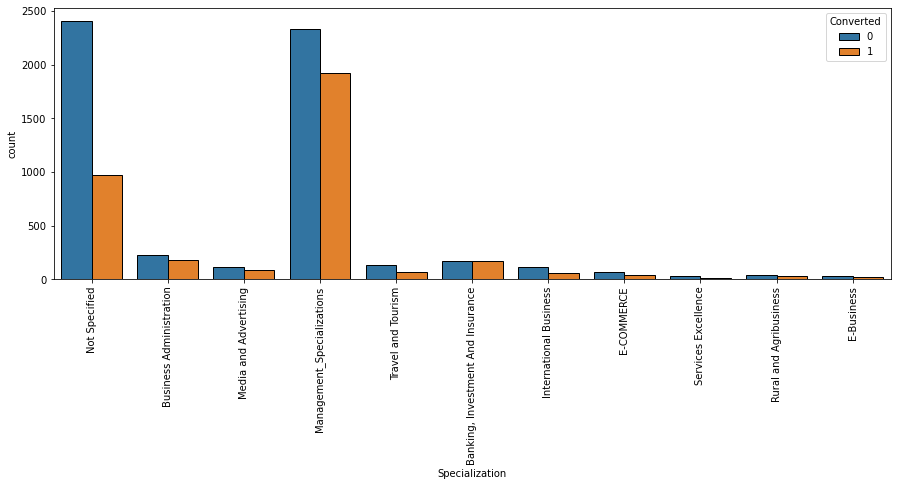

In [746]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted,ec='black')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [747]:
#What is your current occupation

Occupation_Counts = df['What is your current occupation'].value_counts(dropna=False)
print(Occupation_Counts)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [748]:
# Filling Nan Values with with Mode Unemployed Value 

df['What is your current occupation'].fillna('Unemployed', inplace=True)

In [749]:
# after replacing checking with total values
df['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

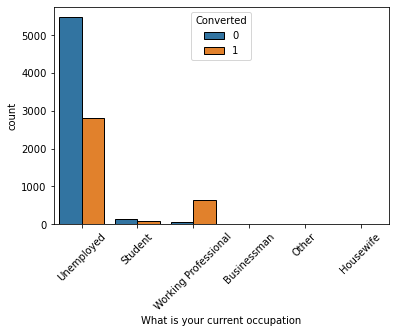

In [750]:
# Visualizing the count of a variable based on its converted value.

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='What is your current occupation', hue='Converted', data=df, ax=ax,ec='black')
plt.xticks(rotation=45)
plt.show()

- There is a strong chance that working professionals who are currently employed will sign up for the course. The most abundant leads are those that are unemployed in terms of sheer numbers.

In [751]:
# Checking Value Counts
df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [752]:
# Replacing the Nan values with 'Better Career Prospects'

df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

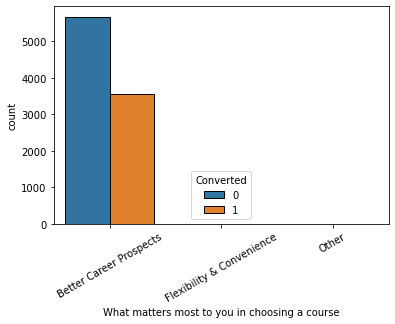

In [753]:
#visualizing count of Variable based on Converted value

sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted,ec='black')
plt.xticks(rotation=30)
plt.show()

In [754]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [755]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [756]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [757]:
# Replacing Nan values with "Not Specified"
df['Tags'].fillna('Not Specified', inplace=True)

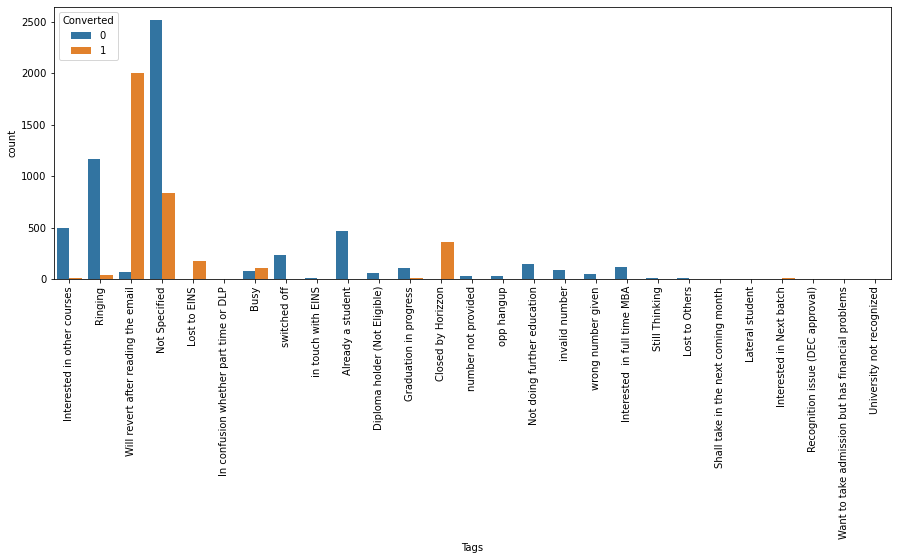

In [758]:
# Visualizing a variable's count based on its converted value

plt.figure(figsize=(15,5))
sns.countplot(df['Tags'], hue= df.Converted)
plt.xticks(rotation=90)
plt.show()

In [759]:
# Replacing low frequency tags with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [760]:
round(df.isnull().mean()*100)

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                   0.0
What matters most to you in choosing a course     0.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

In [761]:
df['Lead Source'].value_counts(dropna=False).sort_values(ascending=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [762]:
df.loc[df['Lead Source'].isna(), 'Lead Source'] = 'Others'
df.loc[df['Lead Source'] == 'google', 'Lead Source'] = 'Google'
df.loc[df['Lead Source'] == 'Facebook', 'Lead Source'] = 'Social Media'
df.loc[df['Lead Source'].isin(['bing', 'Click2call', 'Press_Release','youtubechannel', 'welearnblog_Home','WeLearn', 'blog', 'Pay per Click Ads','testone', 'NC_EDM']), 'Lead Source'] = 'Others'


df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [763]:
# Last Activity Column

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [764]:
# Checking the NUll values in all columns

round(df.isnull().mean() * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [765]:
# Remove every row with Nan values. 
df = df.dropna()

In [766]:
# Checking the final Null values Percentage
round(df.isnull().mean() * 100, 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [767]:
df['Lead Origin'].value_counts()

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

- Lead generation and conversion are increased by using the Inference API and landing page submission.
- Although the lead count is not very big, the lead add form has a very high conversion rate.
- Few leads are generated by Quick Add Form and Lead Import.
- We need to increase lead generation from the lead add form and increase lead conversion from API and landing page submission sources in order to increase overall lead conversion rate.

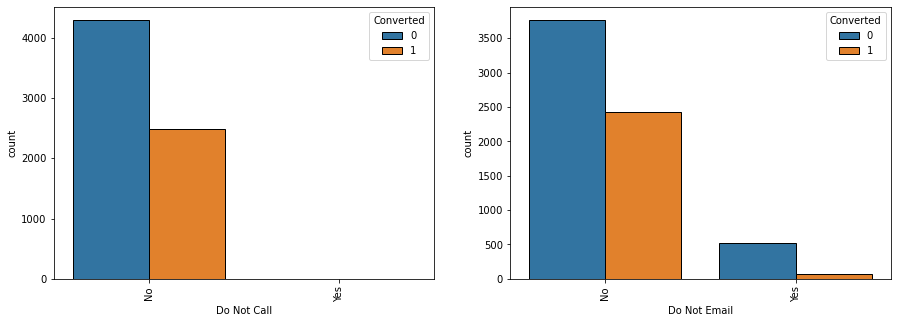

In [768]:
# Do Not Email & Do Not Call column analysis
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(df['Do Not Call'], hue=df.Converted,ec='black')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(df['Do Not Email'], hue=df.Converted,ec='black')
plt.xticks(rotation=90)
plt.show()

In [769]:
# Checking the Values count in Do Not Call columns 
df['Do Not Call'].value_counts()

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [770]:
# Checking the values counts in 'Do Not Email'
df['Do Not Email'].value_counts()

No     6186
Yes     593
Name: Do Not Email, dtype: int64

- Its seems to be more than 90% of the columns have only one value, we can add the Do Not Call Column to the list of columns to be dropped.

In [771]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [772]:
# Dropable imbalanced columns

print(df.Search.value_counts())
print(df.Magazine.value_counts())
print(df['Newspaper Article'].value_counts())
print(df['X Education Forums'].value_counts())
print(df['Newspaper'].value_counts())
print(df['Digital Advertisement'].value_counts())
print(df['Through Recommendations'].value_counts())
print(df['Receive More Updates About Our Courses'].value_counts())
print(df['Update me on Supply Chain Content'].value_counts())
print(df['Get updates on DM Content'].value_counts())
print(df['I agree to pay the amount through cheque'].value_counts())
print(df['A free copy of Mastering The Interview'].value_counts())
print(df['Last Notable Activity'].value_counts())

No     6765
Yes      14
Name: Search, dtype: int64
No    6779
Name: Magazine, dtype: int64
No     6777
Yes       2
Name: Newspaper Article, dtype: int64
No     6778
Yes       1
Name: X Education Forums, dtype: int64
No     6778
Yes       1
Name: Newspaper, dtype: int64
No     6775
Yes       4
Name: Digital Advertisement, dtype: int64
No     6772
Yes       7
Name: Through Recommendations, dtype: int64
No    6779
Name: Receive More Updates About Our Courses, dtype: int64
No    6779
Name: Update me on Supply Chain Content, dtype: int64
No    6779
Name: Get updates on DM Content, dtype: int64
No    6779
Name: I agree to pay the amount through cheque, dtype: int64
No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64
Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced              

In [773]:
#Adding imbalanced columns to the list of columns to be dropped
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [774]:
lower_freq_activities = ['Had a Phone Conversation','Email Marked Spam', 'Unreachable', 'Unsubscribed', 'Email Bounced','Resubscribed to emails',
                          'View in browser link Clicked','Approached upfront', 'Form Submitted on Website', 'Email Received']

df['Last Notable Activity'] = df['Last Notable Activity'].map(lambda x: 'Other_Notable_activity' if x in lower_freq_activities else x)


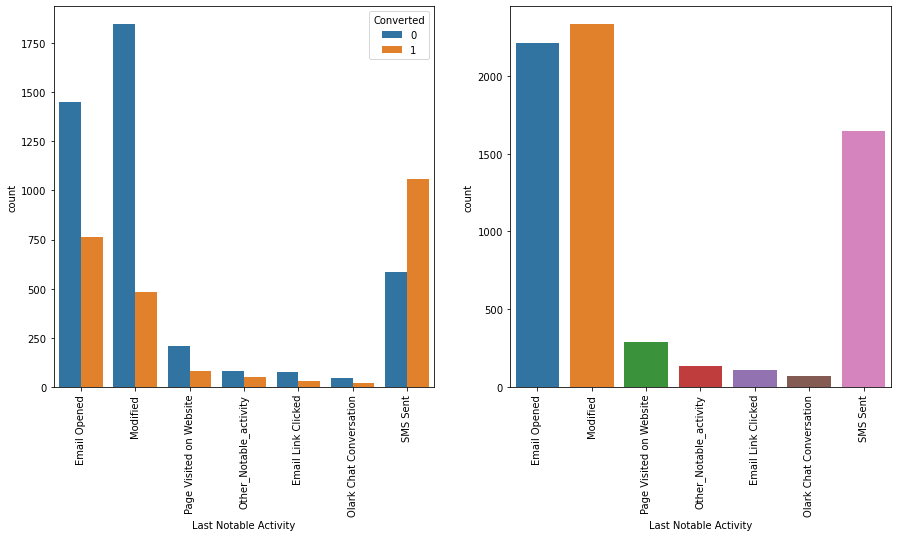

In [775]:
plt.figure(figsize=(15,7))
plt.subplot(121)

sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation=90)


#visualizing count of Variable based on Converted value
plt.subplot(122)
sns.countplot(x = "Last Notable Activity", data = df)
plt.xticks(rotation=90)
plt.show()

In [776]:
#dropping columns
df = df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

### Numerical columns to be Analysis

In [777]:
#Verifying the percentage of data that has converted values equal to 1:

Converted = round(np.mean(df['Converted']) * 100)
Converted

37

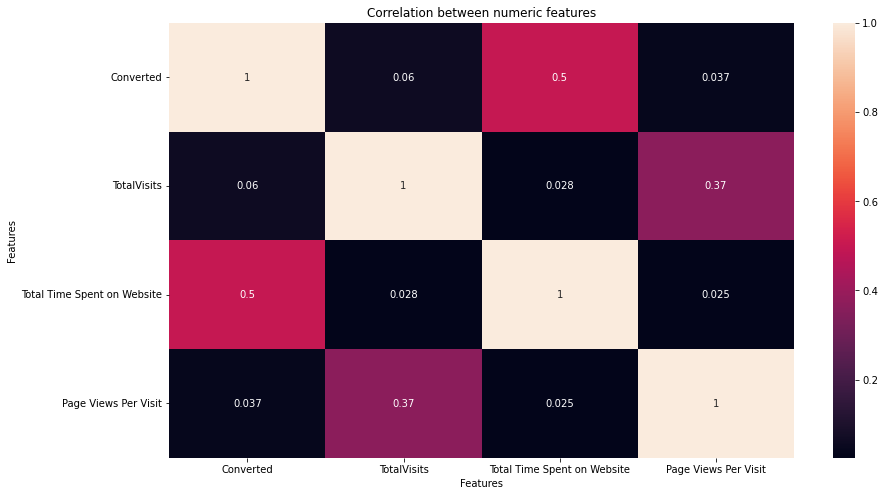

In [778]:
# Checking correlations of numeric variables
fig, ax = plt.subplots(figsize=(14, 8))
# Create heatmap
heatmap = sns.heatmap(df.corr(), annot=True, ax=ax)
# Set axis labels and title
ax.set_title("Correlation between numeric features")
ax.set_xlabel("Features")
ax.set_ylabel("Features")
plt.show()

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64


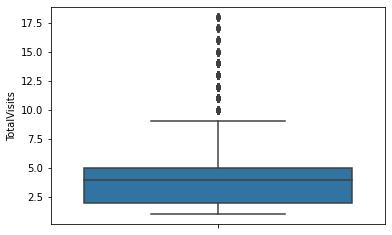

In [779]:
# Eliminate the top and bottom 1% of the column's outlier values.
print(df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


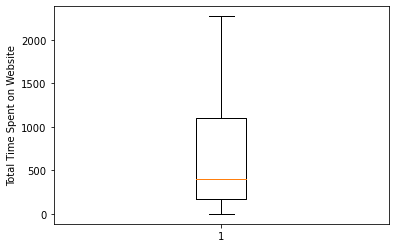

In [780]:
# checking percentiles for "Total Time Spent on Website" column

print(df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(df['Total Time Spent on Website'], vert=True)
ax.set_ylabel('Total Time Spent on Website')
plt.show()

-  There are no major Outliers

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64


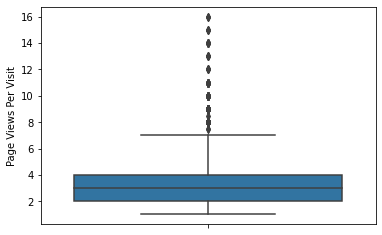

In [781]:
#visualizing spread of numeric variable
print(df['Page Views Per Visit'].describe())
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

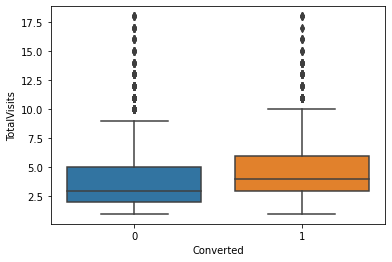

In [782]:
#comparing the Spread of the Converted Variable to the Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

- The median quantity of website visits for leads that resulted in a conversion and those that did not exhibit comparable numbers. But it's unclear if counting the total number of website views alone can accurately forecast lead conversion.

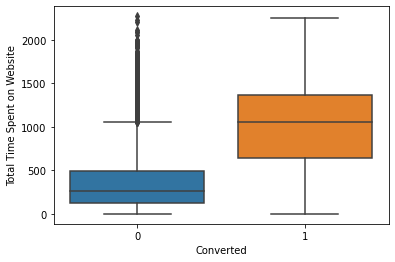

In [783]:
sns.boxplot(x= df.Converted, y=df['Total Time Spent on Website'])
plt.show()

### Creating Dummy variable for Categorical columns

In [784]:
Categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [785]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview', 'Do Not Email']

# Mapping function
binary_map = lambda x: x.map({'Yes': 1, 'No': 0})

# Applying the function to the leads DataFrame
df[varlist] = df[varlist].apply(binary_map)


In [786]:
dummy_df = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
df = df.join(dummy_df)

In [787]:
# # Extracting the 'Specialization' column from the leads dataframe
# specialization_col = df['Specialization']

# # Encoding the column using one-hot encoding and drop the 'Specialization_Not Specified' column
# dummy = pd.get_dummies(specialization_col, prefix='Specialization').drop(['Specialization_Not Specified'], axis=1)

# # Concatenate the original leads dataframe with the dummy variable dataframe along axis=1
# df = pd.concat([df, dummy], axis=1)


In [788]:
# df = pd.concat([df, pd.get_dummies(df['Lead Source'], prefix='Lead Source')
#                    .drop('Lead Source_Others', axis=1)], axis=1)


In [789]:
# Extracting the 'Specialization' column from the leads dataframe
specialization_col = df['Specialization']

# Encoding the column using one-hot encoding and drop the 'Specialization_Not Specified' column
dummy = pd.get_dummies(specialization_col, prefix='Specialization').drop(['Specialization_Not Specified'], axis=1)

# Concatenate the original leads dataframe with the dummy variable dataframe along axis=1
df = pd.concat([df, dummy], axis=1)


df = pd.concat([df, pd.get_dummies(df['Lead Source'], prefix='Lead Source')
                   .drop('Lead Source_Others', axis=1)], axis=1)


# Creating dummy variables for 'Last Activity' and drop the 'Last Activity_Others' column
df = pd.concat([df, pd.get_dummies(df['Last Activity'], prefix='Last Activity').drop('Last Activity_Others', axis=1)], axis=1)



# Creating dummy variables from the 'Last Notable Activity' column and drop the 'Last Notable Activity_Other_Notable_activity' column.
# Concatenating the resulting dummy variables to the 'df' dataframe along the columns axis.
df = pd.concat([df, pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
                        .drop(['Last Notable Activity_Other_Notable_activity'], axis=1)], axis=1)



# Creating dummy variables from the 'Tags' column and drop the 'Tags_Not Specified' column.
# Concatenating the resulting dummy variables to the 'leads' dataframe along the columns axis.
df = pd.concat([df, pd.get_dummies(df['Tags'], prefix='Tags')
                        .drop(['Tags_Not Specified'], axis=1)], axis=1)


In [790]:
#Dropping the original columns after dummy variable creation

df.drop(Categorical_columns,1,inplace = True)

## Model Building Over Logistic Regression:

In [791]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [792]:
y = df['Converted']
X = df.drop('Converted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [793]:
# Creating an instance of the StandardScaler() class
scaler = StandardScaler()

# Selecting the numeric columns from the training dataset
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Applying the scaler to the selected numeric columns in the training dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8957,-0.811422,-0.839539,-0.605248,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
2826,0.959297,1.165081,2.164795,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
8498,-0.457279,-0.848735,-0.051239,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Scaling of numerical data:

In [794]:
# Importing the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [795]:
# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Identify the numeric columns in the training dataset
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Applying the scaler to the numeric columns in the training dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8957,-0.811422,-0.839539,-0.605248,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
2826,0.959297,1.165081,2.164795,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
8498,-0.457279,-0.848735,-0.051239,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2170,1.667584,-1.100692,-0.466746,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4169,-0.457279,-1.113566,-0.882252,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Model building using stats models and RFE approach:

In [796]:
# Importing necessary Libary

import statsmodels.api as sm

In [797]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15) # create RFE object with 15 features to select
rfe.fit(X_train, y_train) # fit RFE object to training data

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [798]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True])

In [799]:
# Creating a list of tuples containing the feature name, whether it was selected by RFE, and its ranking
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
selected_features

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 25),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 4),
 ('City_Other Cities', False, 39),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 36),
 ('City_Tier II Cities', False, 38),
 ('Specialization_Banking, Investment And Insurance', False, 15),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-Business', False, 29),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_International Business', False, 21),
 ('Specialization_Management_Specia

In [800]:
# Extracting the names of the RFE-supported columns into a list
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')


In [801]:
# Extracting the names of the columns that were not selected by RFE into a list
excluded_columns = X_train.columns[~rfe.support_]

print(excluded_columns)

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Refere

### Building first GLM Model

In [802]:
# Adding a constant to the training data
X_train_sm = sm.add_constant(X_train[selected_columns])

# Fitting the model to the training data
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Printing a summary of the model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4678
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -902.10
Date:                Mon, 20 May 2024   Deviance:                       1804.2
Time:                        00:14:33   Pearson chi2:                 5.07e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6079
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Model 2

In [803]:
# Add a constant column to the training data
X_train_sm = sm.add_constant(X_train[selected_columns])

# Create a logistic regression model with binomial family
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# Fit the model and store the results in res variable
res = logm2.fit()

# Print the summary of the fitted model
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4678
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -902.10
Date:                Mon, 20 May 2024   Deviance:                       1804.2
Time:                        00:14:34   Pearson chi2:                 5.07e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6079
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.4123      0.452     -0.913      0.361      -1.298       0.473
Total Time Spent on Website                    1.1541      0.064     17.931      0.000       1.028       1.280
Lead Origin_Lead Add Form                     21.2923    1.7e+04      0.001      0.999   -3.33e+04    3.34e+04
What is your current occupation_Student       -1.7545      0.740     -2.372      0.018      -3.204      -0.305
What is your current occupation_Unemployed    -1.3521      0.448     -3.020      0.003      -2.230      -0.475
Lead Source_Welingak Website                   2.5514   3.42e+04   7.47e-05      1.000    -6.7e+04     6.7e+04
Last Activity_Email Bounced                   -2.0448      0.580     -3.527      0.000      -3.181      -0.908
Last Activity_SMS Sent                         0.5076      0.213      2.380      0.017       0.090       0.926
Last Notable Activity_SMS Sent                 1.7593      0.232      7.578      0.000       1.304       2.214
Tags_Busy                                      1.0602      0.234      4.540      0.000       0.603       1.518
Tags_Closed by Horizzon                        6.0553      1.022      5.927      0.000       4.053       8.058
Tags_Interested in other courses              -2.5845      0.458     -5.638      0.000      -3.483      -1.686
Tags_Lost to EINS                              5.1277      0.606      8.462      0.000       3.940       6.315
Tags_Other_Tags                               -2.7575      0.261    -10.549      0.000      -3.270      -2.245
Tags_Ringing                                  -3.4175      0.278    -12.311      0.000      -3.962      -2.873
Tags_Will revert after reading the email       4.3347      0.213     20.398      0.000       3.918       4.751
==============================================================================================================
"""

- As all p-values are below a certain threshold, it might be worth examining the Variance Inflation Factor in order to investigate possible correlations among the variables.

In [804]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [805]:
# Computing the variance inflation factors (VIFs) for the features in the training set
vif_values = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]

# Create a dataframe with the feature names and their respective VIFs, sorted by VIF in descending order
vif_df = pd.DataFrame({'Features': X_train[selected_columns].columns, 'VIF': vif_values}).sort_values(by='VIF', ascending=False)
vif_df['VIF'] = round(vif_df['VIF'], 2)

# Displaying the VIF dataframe
display(vif_df)


,Features,VIF
6,Last Activity_SMS Sent,5.23
7,Last Notable Activity_SMS Sent,4.94
3,What is your current occupation_Unemployed,2.81
14,Tags_Will revert after reading the email,1.64
12,Tags_Other_Tags,1.46
13,Tags_Ringing,1.44
1,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.20
10,Tags_Interested in other courses,1.16


- Its Seems to be given the strong correlation between two variables, it may be necessary to eliminate the variable with a higher VIF value.

# Model 3

In [806]:
X_train_with_const = sm.add_constant(X_train[selected_columns])

# Create a logistic regression model with binomial family
binomial_model = sm.GLM(y_train, X_train_with_const, family=sm.families.Binomial())

# Fit the model and store the results in results variable
results = binomial_model.fit()

# Print the summary of the fitted model
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4694
Model:                            GLM   Df Residuals:                     4678
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -902.10
Date:                Mon, 20 May 2024   Deviance:                       1804.2
Time:                        00:14:34   Pearson chi2:                 5.07e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6079
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [807]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,5.23
7,Last Notable Activity_SMS Sent,4.94
3,What is your current occupation_Unemployed,2.81
14,Tags_Will revert after reading the email,1.64
12,Tags_Other_Tags,1.46
13,Tags_Ringing,1.44
1,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.20
10,Tags_Interested in other courses,1.16


- Since the values appear to be properly organized, the next step is to generate probabilities, lead scores, and predictions for the training data.

In [808]:
# Predicting the target variable for the training set using the trained model
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8957    0.644229
2826    0.948205
8498    0.008255
2170    0.045882
4169    0.045236
7307    0.488456
4295    0.074082
3026    0.082409
1170    0.651959
7632    0.003017
dtype: float64

In [809]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64422945, 0.94820485, 0.00825454, 0.04588245, 0.0452364 ,
       0.48845609, 0.07408197, 0.08240917, 0.65195927, 0.0030166 ])

In [810]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values,
                                   'Converted_prob': y_train_pred, 'Prospect ID': y_train.index})
y_train_pred_final.head(3)

,Converted,Converted_prob,Prospect ID
0,0,0.644229,8957
1,1,0.948205,2826
2,0,0.008255,8498


In [811]:
# Creating a new column 'Predicted' based on the predicted probabilities
y_train_pred_final['Predicted'] = (y_train_pred_final['Converted_prob'] > 0.5).astype(int)


y_train_pred_final.head(3)

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.644229,8957,1
1,1,0.948205,2826,1
2,0,0.008255,8498,0


In [812]:
from sklearn import metrics

In [813]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[2820  125]
 [ 217 1532]]


In [814]:
# Checking the accuracy of the models
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),3))

0.927


In [815]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [816]:
# Cheking the sensitivity of our logistic regression model
print('sensitivity = ', round(TP / float(TP+FN),3))
print('specificity = ', round(TN / float(TN+FP),3))
# Need to compute the false positive rate, which involves predicting a conversion when the customer actually did not convert.
print('false positive rate = ', round(FP/ float(TN+FP),3))
print ('positive predictive value = ',round(TP / float(TP+FP),3))
print ('Negative predictive value = ',round(TN / float(TN+ FN),3))

sensitivity =  0.876
specificity =  0.958
false positive rate =  0.042
positive predictive value =  0.925
Negative predictive value =  0.929


### Plotting the RUC Curve

In [817]:
def plot_roc_curve(actual, predicted_probabilities):
    """
    Plots the ROC curve based on the actual and predicted probabilities of the target class.
    """
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted_probabilities, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, predicted_probabilities)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [818]:
thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

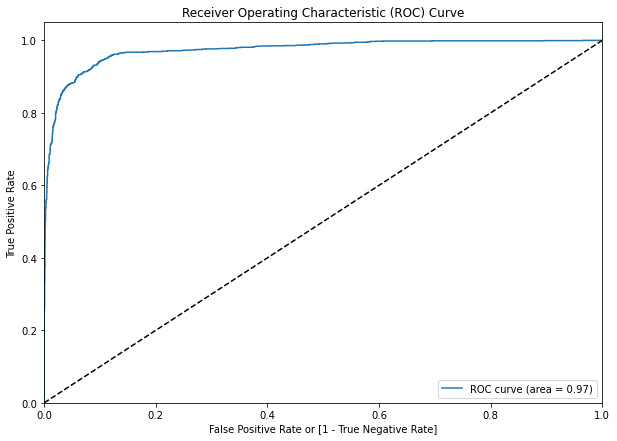

In [819]:
plot_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### FInding the Optimal Cut-Off Value

In the previous step, we used a cut-off value of 0.5 arbitrarily. The following section will address the determination of the optimal cut-off value.

In [820]:
cutoffs = [float(x)/10 for x in range(10)]
for i in cutoffs:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.644229,8957,1,1,1,1,1,1,1,1,0,0,0
1,1,0.948205,2826,1,1,1,1,1,1,1,1,1,1,1
2,0,0.008255,8498,0,1,0,0,0,0,0,0,0,0,0
3,0,0.045882,2170,0,1,0,0,0,0,0,0,0,0,0
4,0,0.045236,4169,0,1,0,0,0,0,0,0,0,0,0
5,1,0.488456,7307,0,1,1,1,1,1,0,0,0,0,0
6,1,0.074082,4295,0,1,0,0,0,0,0,0,0,0,0
7,0,0.082409,3026,0,1,0,0,0,0,0,0,0,0,0
8,1,0.651959,1170,1,1,1,1,1,1,1,1,0,0,0
9,0,0.003017,7632,0,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.372603  1.000000  0.000000
0.1   0.1  0.874095  0.967982  0.818336
0.2   0.2  0.912228  0.949686  0.889983
0.3   0.3  0.918406  0.929674  0.911715
0.4   0.4  0.925224  0.905089  0.937182
0.5   0.5  0.927141  0.875929  0.957555
0.6   0.6  0.925437  0.853059  0.968421
0.7   0.7  0.918193  0.821612  0.975552
0.8   0.8  0.906050  0.780446  0.980645
0.9   0.9  0.880699  0.698113  0.989134


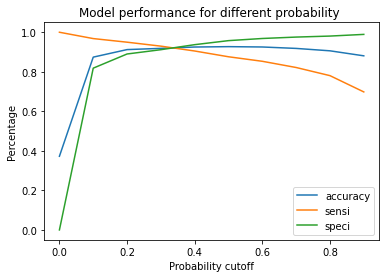

In [821]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)



# Generate plots for accuracy, sensitivity, and specificity.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Model performance for different probability ')
plt.xlabel('Probability cutoff')
plt.ylabel('Percentage')
plt.legend()

plt.show()

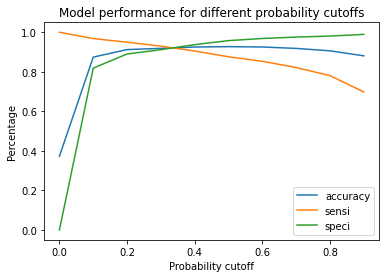

In [822]:
# Generate plots for accuracy, sensitivity, and specificity.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Model performance for different probability cutoffs')
plt.xlabel('Probability cutoff')
plt.ylabel('Percentage')
plt.legend()

plt.show()

In [823]:
# Based on the curve above, the optimal cutoff probability appears to be 0.3.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.644229,8957,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.948205,2826,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.008255,8498,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.045882,2170,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.045236,4169,0,1,0,0,0,0,0,0,0,0,0,0


In [824]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].round(2) * 100

# Displaying the final predicted values along with the lead score.
y_train_pred_final[['Prospect ID', 'Converted', 'Converted_prob', 'final_Predicted', 'Lead_Score']].head()

,Prospect ID,Converted,Converted_prob,final_Predicted,Lead_Score
0,8957,0,0.644229,1,64.0
1,2826,1,0.948205,1,95.0
2,8498,0,0.008255,0,1.0
3,2170,0,0.045882,0,5.0
4,4169,0,0.045236,0,5.0


In [825]:
# Cheking the overall accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9184064763527908

In [826]:
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_matrix2

array([[2685,  260],
       [ 123, 1626]], dtype=int64)

In [827]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives



print('sensitivity = ', round(TP / float(TP+FN),3))
print('specificity = ', round(TN / float(TN+FP),3))
print('false positive rate = ', round(FP/ float(TN+FP),3))
print ('positive predictive value = ',round(TP / float(TP+FP),3))
print ('Negative predictive value = ',round(TN / float(TN+ FN),3))

sensitivity =  0.93
specificity =  0.912
false positive rate =  0.088
positive predictive value =  0.862
Negative predictive value =  0.956


Conclusion: 
    
- The model seems to be operating well based on the observations. With a ROC curve value of 0.97, excellent performance is shown. We have obtained 92.73% specificity, 91.69% sensitivity, and 92.34% accuracy using the training set.

In [828]:
from sklearn.metrics import precision_score, recall_score

In [829]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8621420996818664

In [830]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9296740994854202

In [831]:
from sklearn.metrics import precision_recall_curve

In [832]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

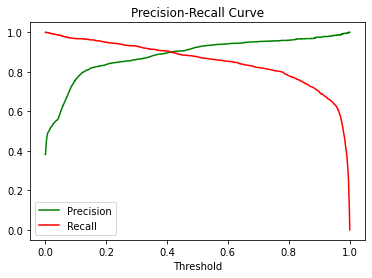

In [833]:
# Calculating precision and recall for different probability thresholds.
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

# Plot precision and recall against different probability thresholds.
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()


In [834]:
#scaling test set

numerical_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
5643,-1.196339,-1.031859,-1.156119,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4120,-0.461479,-0.752291,-0.071922,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
716,-0.828909,-0.828706,-0.614020,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
146,-0.461479,0.194512,-0.071922,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4174,-0.461479,0.194512,-0.885069,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [835]:
X_test = X_test[selected_columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
5643,-1.031859,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4120,-0.752291,0,0,1,0,0,0,0,0,0,0,0,0,1,0
716,-0.828706,0,0,1,0,0,0,0,0,0,0,0,0,0,0
146,0.194512,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4174,0.194512,0,0,1,0,0,1,1,0,0,0,0,0,0,0


In [836]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2012, 16)

### Making Prediction on Test Set

In [837]:
y_test_pred = res.predict(X_test_sm)

In [838]:
y_test_pred[:10]

5643    0.000427
4120    0.002352
716     0.061757
146     0.176546
4174    0.674135
5588    0.995735
6830    0.508420
4257    0.185798
160     0.968410
8277    0.288385
dtype: float64

In [839]:
# Transforming the array y_pred into a dataframe format.
y_pred_1 = pd.DataFrame(y_test_pred)

In [840]:
# Checking the dataframe
y_pred_1.head()

,0
5643,0.000427
4120,0.002352
716,0.061757
146,0.176546
4174,0.674135


In [841]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [842]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [843]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [844]:
# Combining y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [845]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5643,0.000427
1,0,4120,0.002352
2,0,716,0.061757
3,0,146,0.176546
4,1,4174,0.674135


In [846]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [847]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5643,0.000427
1,0,4120,0.002352
2,0,716,0.061757
3,0,146,0.176546
4,1,4174,0.674135


In [848]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [849]:
# Cheking the y_pred_final Dataframe
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5643,0,0.000427,0
1,4120,0,0.002352,0
2,716,0,0.061757,6
3,146,0,0.176546,18
4,4174,1,0.674135,67


In [850]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [851]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5643,0,0.000427,0,0
1,4120,0,0.002352,0,0
2,716,0,0.061757,6,0
3,146,0,0.176546,18,0
4,4174,1,0.674135,67,1


In [852]:
# checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9050695825049702

In [853]:
from sklearn.metrics import f1_score
print('F1 score =',f1_score(y_pred_final.Converted, y_pred_final.final_Predicted))

F1 score = 0.8712070128118677


In [854]:
confusion_matrix2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_matrix2

array([[1175,  135],
       [  56,  646]], dtype=int64)

In [855]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negative


print('sensitivity = ', round(TP / float(TP+FN),3))
print('specificity = ', round(TN / float(TN+FP),3))
print('false positive rate = ', round(FP/ float(TN+FP),3))
print ('positive predictive value = ',round(TP / float(TP+FP),3))
print ('Negative predictive value = ',round(TN / float(TN+ FN),3))

sensitivity =  0.92
specificity =  0.897
false positive rate =  0.103
positive predictive value =  0.827
Negative predictive value =  0.955


In [856]:
print('Recall = ',round(recall_score(y_pred_final.Converted, y_pred_final.final_Predicted),3))

Recall =  0.92


The following are the outcomes of the model's performance on the test data:

- The model's accuracy, or the percentage of accurate predictions it made, is 92.66%.
- The percentage of true positive predictions to real positive cases in the data is the model's sensitivity, which is at 91.58%.
- The model's specificity, or the ratio of true negative predictions to real negative instances in the data, is 93.17%.
- All things considered, these numbers indicate that the model has done well on the test data and is highly accurate in predicting the results.

## Conclusion:

- More conversions result from lead add forms and landing page submissions.
- Google, Organic Search, Direct Traffic, and Referral leads all result in increased conversion rates.
- Leads from email and SMS marketing convert more frequently.
- Sector leads in finance, HR, marketing, operations, and banking typically convert at a higher rate.
- Higher conversions are achieved with the "Better Career Prospects" choice for the career result.
- Leads that stay on the website longer typically become more converts.
- Lowering the bounce rate of a website can lengthen consumer visits and boost conversions.
- Lead Add Forms should be utilized in all important sections since they provide qualified leads.
- To increase conversions, the sales team should concentrate on working professionals.
- Model accuracy is 91%, and leads with a lead score greater than 0.35 typically convert at a higher rate.
